In [2]:
import pandas as pd
text_ana=pd.read_csv('text_analysis_twitter.csv')
text_ana=text_ana.drop(['Unnamed: 0'],axis=1) #删除第一列，即名为“Unnamed:0”的列

In [3]:
import re
def preprocess_text(text):
    text = text.lower() #小写
    text = re.sub(r'http\S+','',text) #用空字符串替换http后面的连续非空字符串，即删除url
    return text

In [4]:
from sklearn.feature_extraction.text import CountVectorizer #将文本转化为词袋模型的特征矩阵
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_ana['text'].apply(preprocess_text)) #将经过预处理的文本数据应用于 CountVectorizer，并通过 fit_transform 方法将文本转换为词袋特征矩阵
print('词袋特征矩阵的形状：', X.shape) #打印词袋特征矩阵 X 的形状
print('特征词列表：', vectorizer.get_feature_names_out()) #获取词袋模型中的特征词列表

词袋特征矩阵的形状： (300000, 121376)
特征词列表： ['00' '000' '0000' ... '투표하십시오' '한국어' 'ﬂees']


list(X.toarray()) #运行挂掉，返回一个稠密的表示词袋特征矩阵X的NumPy数组

In [7]:
feature_words = vectorizer.get_feature_names_out() #获取词袋模型中的特征词列表
word_freq = dict(zip(feature_words, X.sum(axis=0).A1)) #计算了每个特征词在文本数据中的频次

In [8]:
sorted (word_freq.items(), key = lambda x: x[1], reverse= True)

[('the', 247160),
 ('to', 235370),
 ('of', 112428),
 ('in', 104912),
 ('and', 104025),
 ('for', 102100),
 ('rt', 83461),
 ('on', 72986),
 ('amp', 65500),
 ('is', 64785),
 ('we', 53564),
 ('our', 49736),
 ('this', 45532),
 ('you', 40235),
 ('with', 39027),
 ('it', 38749),
 ('that', 38161),
 ('qt', 35691),
 ('at', 33821),
 ('are', 31301),
 ('will', 29565),
 ('tax', 28529),
 ('my', 27644),
 ('be', 26920),
 ('from', 26202),
 ('today', 24574),
 ('have', 23005),
 ('by', 22865),
 ('more', 22665),
 ('trump', 19894),
 ('bill', 19534),
 ('their', 19129),
 ('about', 18973),
 ('as', 18391),
 ('all', 18295),
 ('not', 18197),
 ('your', 17615),
 ('who', 17098),
 ('can', 15465),
 ('health', 14215),
 ('has', 14119),
 ('an', 13861),
 ('they', 13858),
 ('us', 13825),
 ('here', 13799),
 ('house', 13680),
 ('people', 13486),
 ('great', 13468),
 ('now', 13113),
 ('families', 12838),
 ('must', 12787),
 ('up', 12602),
 ('was', 12513),
 ('need', 12313),
 ('americans', 12279),
 ('help', 12145),
 ('act', 12064),

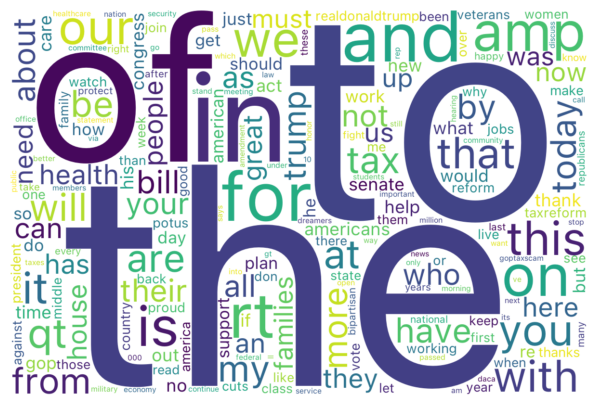

<Figure size 640x480 with 0 Axes>

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=1200, height=800, background_color='white', font_path='/Library/Fonts/SF-Pro-Text-Regular.otf').generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear') #使用双线性插值来平滑显示图像
plt.axis('off') #关闭图形的坐标轴显示
plt.show()
plt.savefig('wordcloud_twi.png',dpi=100)